In [1]:
from data_provider.data_loader import Dataset_ETT_hour
import numpy as np

# Mock args
args = type('Args', (), {'augmentation_ratio': 0})()

# Create dataset
dataset = Dataset_ETT_hour(
    args=args,
    root_path='./dataset/ETT-small/',
    flag='train',
    size=[96, 48, 96],
    features='M',
    data_path='ETTh1.csv',
    target='OT',
    scale=True,
    timeenc=1,
    freq='h',
    seasonal_patterns=None,
)

print('Covariance matrix shape:', dataset._cov_matrix.shape)


Covariance matrix shape: (7, 7)


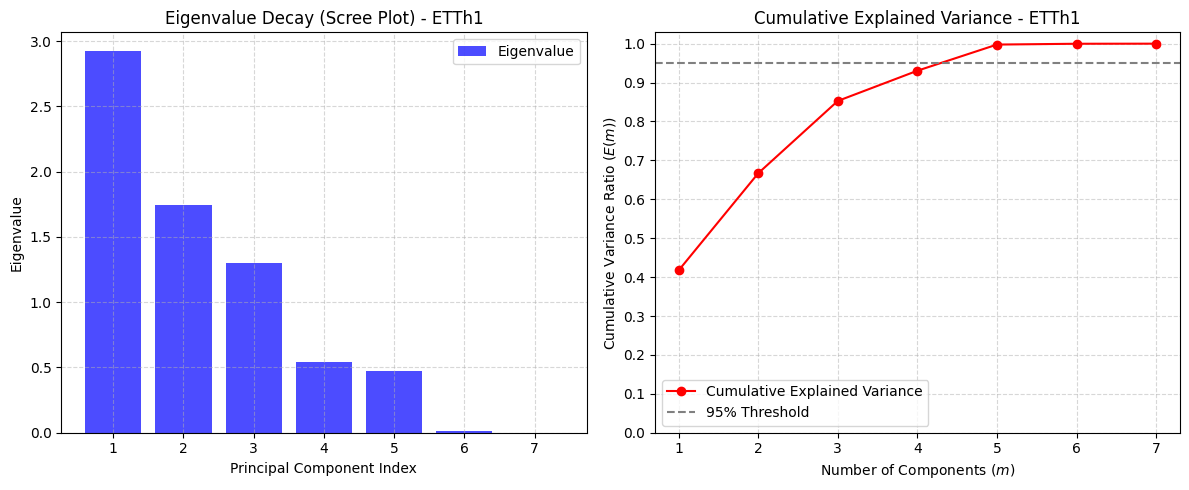

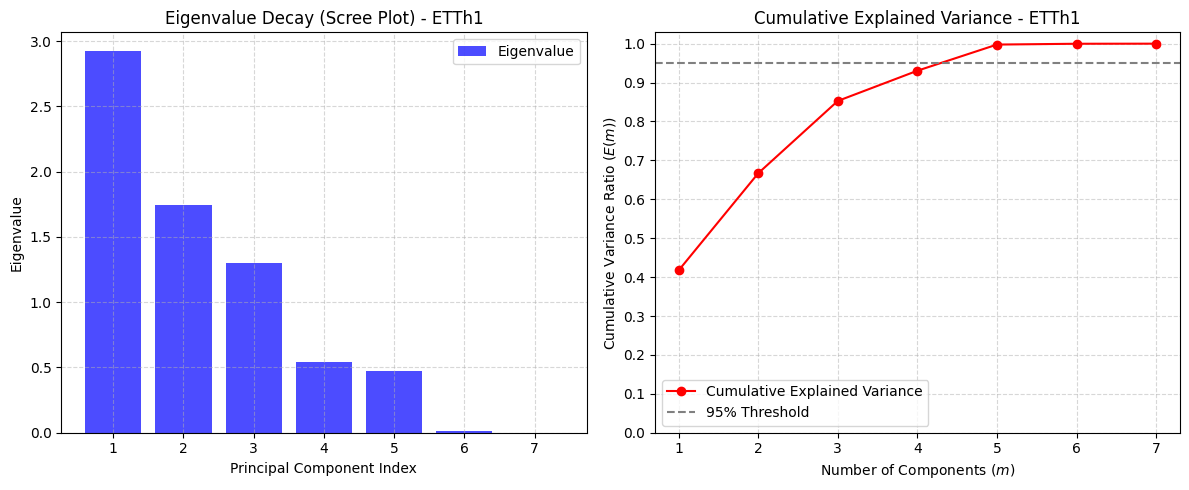

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



# 1. 获取协方差矩阵 (d x d)
cov_matrix = dataset._cov_matrix 
# 对于ETTh1, d=7

# 2. 计算特征值
# 使用 np.linalg.eigvalsh 因为协方差矩阵是 Hermitian (对称) 矩阵
eigenvalues = np.linalg.eigvalsh(cov_matrix)

# 3. 将特征值从大到小排序
eigenvalues = np.sort(eigenvalues)[::-1]
d = len(eigenvalues) # 变量的数量

# 4. 计算累计解释方差
total_variance = np.sum(eigenvalues)
cumulative_variance_ratio = np.cumsum(eigenvalues) / total_variance

# --- 绘图 ---
plt.figure(figsize=(12, 5))

# 图1: 特征值条形图 (Scree Plot)
plt.subplot(1, 2, 1)
component_indices = np.arange(1, d + 1)
plt.bar(component_indices, eigenvalues, color='b', alpha=0.7, label='Eigenvalue')
plt.title('Eigenvalue Decay (Scree Plot) - ETTh1')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.xticks(component_indices)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# 图2: 累计解释方差图
plt.subplot(1, 2, 2)
plt.plot(component_indices, cumulative_variance_ratio, 'r-o', label='Cumulative Explained Variance')
plt.title('Cumulative Explained Variance - ETTh1')
plt.xlabel('Number of Components ($m$)')
plt.ylabel('Cumulative Variance Ratio ($E(m)$)')
plt.xticks(component_indices)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.axhline(y=0.95, color='grey', linestyle='--', label='95% Threshold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
# plt.savefig('ETTh1_PCA_Analysis.png', dpi=300)

# --- 打印关键数据 ---
# print(f"Dataset: ETTh1 (d={d})")
# print("Sorted Eigenvalues (lambda_i):")
# for i, val in enumerate(eigenvalues):
#     print(f"  lambda_{i+1}: {val:.4f}")

# print("\nCumulative Explained Variance (E(m)):")
# for i, val in enumerate(cumulative_variance_ratio):
#     print(f"  E({i+1}): {val:.4f} ({(val * 100):.1f}%)")